# Lista 8 de exercícios - Visualização de dados

Chegamos à ultima lista de exercícios do nosso curso, do tema "Visualização de dados". Aqui, usaremos um *dataset* de dados de uma certa clínica médica, em que cada observação corresponde a um paciente. Importemos os dados:

In [356]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:
# baixando os dados #
data = pd.read_csv("insurance.csv")
display(data)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Breve descrição das colunas:


**age**: idade do beneficiário primário

**sex**: gênero do contratante 

**bmi**: índice de massa corporal (IMC)

**children**: número de crianças cobertas pelo plano / número de dependentes

**smoker**: fumante ("yes", se fumante; "no", se não fumante)

**region**: área residencial do paciente nos EUA: Nordeste (northeast), Sudeste (southeast), Sudoeste (southwest), Noroeste (northwest).

**charges**: custos médicos individuais cobrados pelo plano de saúde

Explorando os dados:

In [358]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [359]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [360]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exercícios:

### 1) Faça um gráfico para analisar a associação entre idade e cobrança do plano.

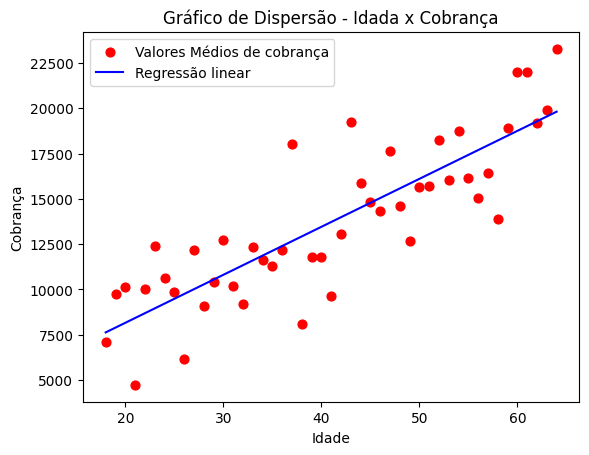

In [361]:
### SEU CÓDIGO COMEÇA AQUI ###

# Valores médios de 'charges' para cada valor único de 'age'
media_cobrança_por_idade = data.groupby('age')['charges'].mean().reset_index()

# # Ordenar os valores pela coluna 'age'
data.sort_values(by='age', inplace=True)

# Plotar o gráfico 
plt.scatter(media_cobrança_por_idade['age'], media_cobrança_por_idade['charges'], s=40, color='red', label='Valores Médios de cobrança')

# Rótulos aos eixos x e y
plt.xlabel('Idade')
plt.ylabel('Cobrança')

# Título ao gráfico
plt.title('Gráfico de Dispersão - Idada x Cobrança')

# Regressão linear
coeficiente = np.polyfit(media_cobrança_por_idade['age'], media_cobrança_por_idade['charges'], 1)
linha = np.poly1d(coeficiente)
plt.plot(media_cobrança_por_idade['age'], linha(media_cobrança_por_idade['age']), color='blue', label='Regressão linear')

# Legenda
plt.legend()

# Gráfico
plt.show()

### 2) 

#### a) Faça um gráfico para analisar a quantidade de fumantes e não-fumantes na amostra

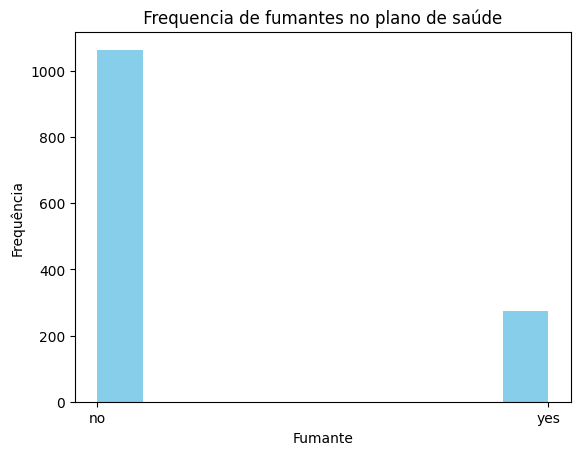

In [362]:

plt.hist(x='smoker', data = data, color ='skyblue')
plt.xlabel("Fumante")
plt.ylabel("Frequência")
plt.title(" Frequencia de fumantes no plano de saúde ")
plt.show()

#### b) Agora, faça um gráfico para analisar a quantidade de homens e mulheres na amostra

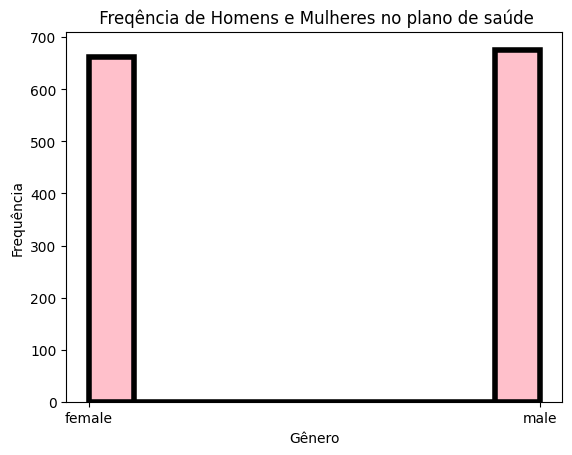

In [363]:
plt.hist(x='sex', data = data, color ='pink', ec= 'black', lw=4)
plt.xlabel("Gênero")
plt.ylabel("Frequência")
plt.title(" Freqência de Homens e Mulheres no plano de saúde")
plt.show()

#### c) Por fim, faça um gráfico para analisar a quantidade de indivíduos de cada sexo em cada categoria de "smoker" (fumante)
dica: dê uma olhada na função ```.countplot()``` do *Seaborn*

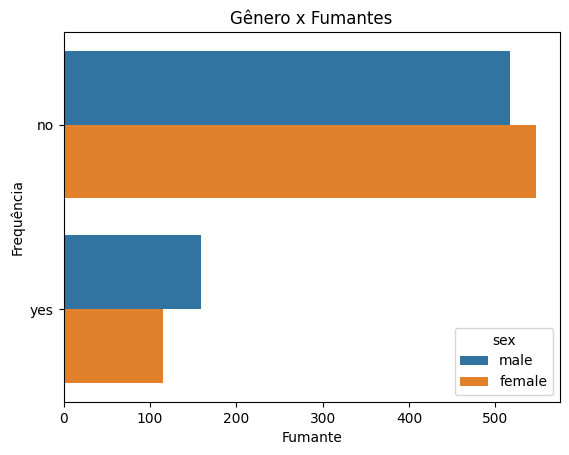

In [364]:
### SEU CÓDIGO COMEÇA AQUI ###
import seaborn as sns

sns.countplot(y = 'smoker', data = data, hue = 'sex', hue_order={'male', 'female'})
plt.xlabel("Fumante")
plt.ylabel("Frequência")
plt.title("Gênero x Fumantes")
plt.show()


### 3) Faça um gráfico que nos permita analisar a distribuição da cobrança do plano de saúde para cada região dos EUA

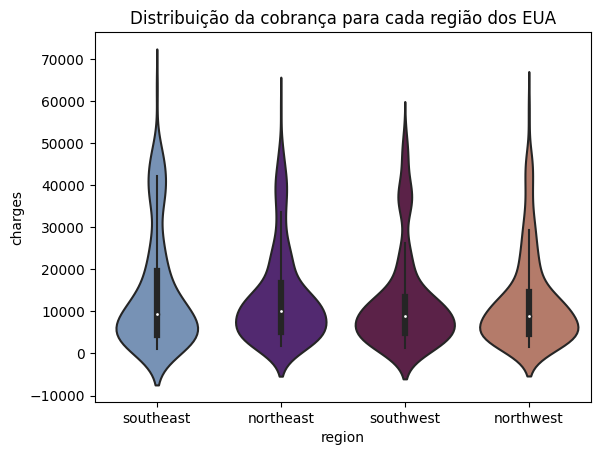

In [365]:
### SEU CÓDIGO COMEÇA AQUI ###
import matplotlib.pyplot as plt
sns.violinplot( x = 'region', data = data, y = 'charges', palette='twilight')

plt.title("Distribuição da cobrança para cada região dos EUA")
plt.show()

### 4) Faça um gráfico que nos permita ver a evolução da proporção de fumantes para cada idade na amostra

#### a) Faça um gráfico que nos permita ver a evolução da proporção de fumantes para cada idade na amostra

In [366]:
### SEU CÓDIGO COMEÇA AQUI ###

# # Ordenar os valores pela coluna 'age'
data.sort_values(by='age', inplace=True)

# Plotar o gráfico 
plt.bar(fumantes_por_idade['age'], fumantes_por_idade['smoker'], s=40, color='red', label='Valores de fumantes')

# Rótulos aos eixos x e y
plt.xlabel('Idade')
plt.ylabel('Cobrança')

# Título ao gráfico
plt.title('Gráfico de Dispersão - Idada x Cobrança')

# Regressão linear
coeficiente = np.polyfit(fumantes_por_idade['age'], fumantes_por_idade['smoker '], 1)
linha = np.poly1d(coeficiente)
plt.plot(fumantes_por_idade['age'], linha(fumantes_por_idade['age']), color='blue', label='Regressão linear')

# Legenda
plt.legend()

# Gráfico
plt.show()


NameError: name 'fumantes_por_idade' is not defined

#### b) Faça um gráfico que nos permita ver a evolução do IMC médio para cada idade na amostra

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###

#### c) Faça um gráfico que nos permita analisar a evolução do número médio de crianças no plano para cada idade na amostra

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###

### 5) Faça um gráfico que nos permita analisar a correlação entre todas as colunas ao mesmo tempo (para incluir "sex" e "smoker" na análise, crie variáveis binárias para cada uma das colunas)
dica: crie um novo dataframe com as duas colunas citadas com variáveis binárias

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###

### 6) Faça um gráfico interativo e dinâmico da distribuição de cobrança para fumantes e não-fumantes 
dica: o nome da função na biblioteca é ```.box()```

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###